In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn import *

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/machineLearningLabs/tmdb_5000_movies.csv", delimiter=',')
data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
# from sklearn.linear_model import LinearRegression
# def getR2Score(model,df):
#     cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
#     r2Res = cross_val_score(model, df.loc[:, df.columns != 'popularity'], df['popularity'], cv=cv,
#                             scoring="r2").mean()
#     # print('R2: {}'.format(r2Res))
#     return r2Res

# def getBinary(n):
#     b = ''
#     while n > 0:
#         b = str(n % 2) + b
#         n = n // 2
#     return b

# data = data.drop(columns=['homepage','genres','id','keywords','original_title','overview','status','tagline','title'])
# df = data.loc[:, data.columns != 'popularity'].keys()
# print(pow(2,len(df)))
# s = 0
# keys = []
# newData = []
# max=0.6
# warnings.filterwarnings("ignore")
# for n in range(1,pow(2,len(df))):
#     current = getBinary(n)[::-1]
#     for i in range(0, len(current)):
#         if current[i] == '1':
#             newData.append(df[i])
#     newDf = data[newData]
#     for c in newDf.keys():
#         newDf[c] = preprocessing.LabelEncoder().fit_transform(newDf[c])
#     newDf['popularity'] = data['popularity']
#     model = LinearRegression()
#     r2 = getR2Score(model,newDf)
#     if n%100==0:
#         print(n)
#     if r2>max:
#         print('{} {}'.format(r2,newDf.loc[:, newDf.columns != 'popularity'].keys()))
#         max=r2
#     newData = []

# Код для перебора всех возможных комбинаций признаков и проверке их на модели линейной регресии - лучший вариант написал снизу
# Замечание: так как этот код не учитывает фокусы с признаками которые будут ниже (типа нормализации или изменения вида признака), то поэтому этот результат и вышел таким слабым, однако в качестве начального выбора признаков это идеально

# 0.6262748868034753 Index(['production_companies', 'release_date', 'revenue', 'runtime',
      #  'spoken_languages', 'vote_count'],
      # dtype='object')

In [ ]:
data1 = data[['popularity','budget','genres','release_date','original_language','runtime','vote_count','revenue','spoken_languages']]
data1 = data1.dropna()

# год улучшает ситуацию где-то на 0.02 - видимо связано с тем что новые пользователи imdb смотрят новые фильмы а те которые были до imdb пользователи гораздо реже смотрят
# приведем в более подходящий вид несколько признаков:
data1['release_date'] = data1['release_date'].apply(lambda x: float(str(x).split('-')[0])-1916.0 if x is not None else 0.0)
data1['original_language'] = data1['original_language'].apply(lambda x: 1 if 'en' == x else 0)

vote_count: 3.8230475937021193
budget: 2.4363682378512626
runtime: 0.740107621706007
revenue: 4.443525507181366


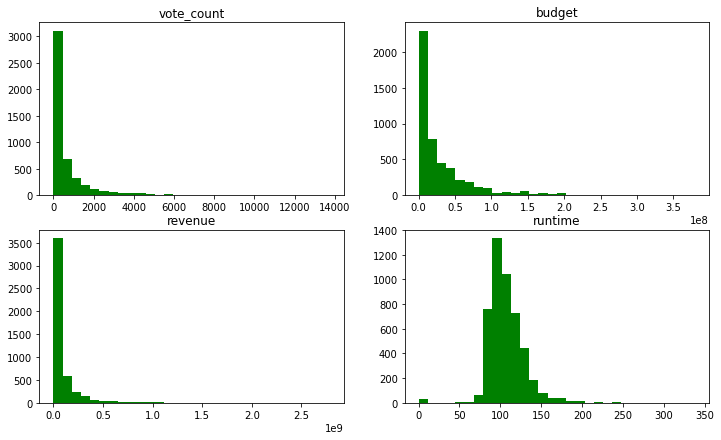

In [ ]:
# проверим признаки на перекос значений
print('vote_count:', data1['vote_count'].skew())
print('budget:', data1['budget'].skew())
print('runtime:', data1['runtime'].skew())
print('revenue:', data1['revenue'].skew())

fig, axs = plt.subplots(2,2)
axs[1,0].hist(data1['revenue'].values,bins=30,color='green')
axs[1,0].set_title('revenue')
axs[1,1].hist(data1['runtime'].values,bins=30,color='green')
axs[1,1].set_title('runtime')
axs[0,1].hist(data1['budget'].values,bins=30,color='green')
axs[0,1].set_title('budget')
axs[0,0].hist(data1['vote_count'].values,bins=30,color='green')
axs[0,0].set_title('vote_count')
plt.show()

In [ ]:
# аппроксиимруем признаки с выраженным перекосом (кроме бюджета - его изменим позже, labelEncoder показал лучший результат по сравнению с log и sqrt):

data1['vote_count'] = data1['vote_count'].apply(lambda x: 1 if x == 0 else x)
# строчка выше нужна для логарифмирования  вместо этого можно использовать sqrt или LabelEncoder, но проверено что ухудшит немного

# логарифмируем значения признаков с перекосом
data1['vote_count'] = np.log(data1['vote_count'].values)
data1['revenue'] = np.sqrt(data1['revenue'].values)

vote_count: -0.5621923959614243
revenue: 1.4328922502365495


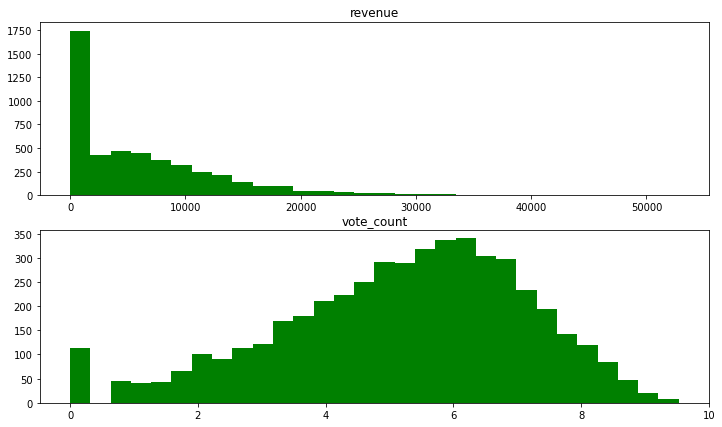

In [ ]:
print('vote_count:', data1['vote_count'].skew())
print('revenue:', data1['revenue'].skew())

fig, axs = plt.subplots(2)
axs[0].hist(data1['revenue'].values,bins=30,color='green')
axs[0].set_title('revenue')
axs[1].hist(data1['vote_count'].values,bins=30,color='green')
axs[1].set_title('vote_count')
plt.show()

In [ ]:
# воспользуемся one hot encoding и выразим жанры, также сразу удалим жанр western - перебором можно сделать вывод что это повысит r2-score у XGBRegressor на 1.3 (и у других кроме RandomForestRegressor)
genre_list = ['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation','Family',  'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music']
for genre in genre_list:
  data1[genre] = data1['genres'].apply(lambda x: 1 if genre in x else 0)
data1 = data1.drop(columns=['genres'])
data1.head(1)

,popularity,budget,release_date,original_language,runtime,vote_count,revenue,spoken_languages,Action,Adventure,...,Thriller,Animation,Family,Comedy,Romance,Horror,Mystery,History,War,Music
0,150.437577,237000000,93.0,1,162.0,9.375855,52801.184523,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# нужно чтобы привести в порядок значения популярности, также замечу что до этого у популярности наблюдался перекос
# уберем перекос значения у бюджета
# также приведем spoken_languages к числовому виду
print('popularity:', data1['popularity'].skew())
print('budget:', data1['budget'].skew())
le = preprocessing.LabelEncoder()
for c in [
'popularity',
'spoken_languages',
'budget',
]:
  data1[c] = le.fit_transform(data1[c])
print('popularity:', data1['popularity'].skew())
print('budget:', data1['budget'].skew())

popularity: 9.72137523389067
budget: 2.4363682378512626
popularity: 0.00022405532797513026
budget: -0.3614130274700828


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Нормализуем данные для улучшения результатов моделей регрессии
# Итог: увеличил метрику с 0.9255984815596152 до 0.9255993283007726
scaler = MinMaxScaler()
x=data1.loc[:, data1.columns != 'popularity']
data2 = pd.DataFrame(scaler.fit_transform(x),index=x.index, columns=x.columns)

# масштабирование целевого признака привело к небольшому ухудшению результата, поэтому заменяем прошлыми значениями
data2['popularity'] = data1['popularity']
data2.head()

,budget,release_date,original_language,runtime,vote_count,revenue,spoken_languages,Action,Adventure,Fantasy,...,Animation,Family,Comedy,Romance,Horror,Mystery,History,War,Music,popularity
0,0.979263,0.920792,1.0,0.479290,0.983935,1.000000,0.329650,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4780
1,0.997696,0.900990,1.0,0.500000,0.882767,0.587108,0.705341,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4769
2,0.981567,0.980198,1.0,0.437870,0.881971,0.562036,0.742173,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4728
3,0.983871,0.950495,1.0,0.488166,0.956737,0.623820,0.705341,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4736
4,0.990783,0.950495,1.0,0.390533,0.803978,0.319243,0.705341,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180


In [ ]:
from sklearn.model_selection import cross_val_score

def getR2Score(model):
  cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
  r2Res = cross_val_score(model, data2.loc[:, data2.columns != 'popularity'], data2['popularity'], cv = cv,scoring="r2").mean()
  print('R2: {}'.format(r2Res))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

LinearRegression = LinearRegression()
getR2Score(LinearRegression)

R2: 0.8772014971936647


In [ ]:
Ridge = Ridge(random_state=0)
getR2Score(Ridge)

R2: 0.8771654048373557


In [ ]:
Lasso = Lasso(random_state=0)
getR2Score(Lasso)

R2: 0.8769532796769809


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor(random_state=0)
getR2Score(RandomForestRegressor)

R2: 0.9170882878982971


In [ ]:
from xgboost import XGBRegressor
XGBRegressor = XGBRegressor(random_state=0,verbose=0,objective='reg:squarederror')
getR2Score(XGBRegressor)

R2: 0.9255993283007726
